<h1><b>DATA AND LIBRARIES IMPORT</b></h1>

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [425]:
taxi_data_jan22 = pd.read_csv("data/yellow_tripdata_jan22.csv",low_memory = False)

taxi_data = pd.concat([taxi_data_jan22])
print(taxi_data.shape)
taxi_data.head()

(2463931, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


<h1><b>DATA EXPLORATION</b></h1>

In [427]:
print(taxi_data.columns)
taxi_data.isnull().sum()


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [428]:
taxi_data[taxi_data['passenger_count'].isnull()]['payment_type'].head()

2392428    0
2392429    0
2392430    0
2392431    0
2392432    0
Name: payment_type, dtype: int64

In [429]:
taxi_data[taxi_data['passenger_count'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
143,1,2022-01-01 00:17:34,2022-01-01 00:20:25,0.0,0.9,1.0,N,236,262,2,5.0,3.0,0.5,0.00,0.0,0.3,8.80,2.5,0.0
144,1,2022-01-01 00:23:57,2022-01-01 00:24:49,0.0,0.0,1.0,N,263,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5,0.0
145,1,2022-01-01 00:31:53,2022-01-01 00:36:31,0.0,1.3,1.0,N,140,229,1,6.0,3.0,0.5,2.90,0.0,0.3,12.70,2.5,0.0
146,1,2022-01-01 00:41:40,2022-01-01 00:46:11,0.0,1.3,1.0,N,163,236,1,6.0,3.0,0.5,2.45,0.0,0.3,12.25,2.5,0.0
157,1,2022-01-01 00:55:36,2022-01-01 01:03:26,0.0,0.5,1.0,N,162,161,1,6.5,3.0,0.5,0.00,0.0,0.3,10.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392400,1,2022-01-31 23:01:07,2022-01-31 23:05:28,0.0,0.4,1.0,N,239,143,1,4.5,3.0,0.5,1.66,0.0,0.3,9.96,2.5,0.0
2392401,1,2022-01-31 23:10:42,2022-01-31 23:23:19,0.0,2.2,1.0,N,142,141,1,10.0,3.0,0.5,2.75,0.0,0.3,16.55,2.5,0.0
2392402,1,2022-01-31 23:26:46,2022-01-31 23:38:52,0.0,2.4,1.0,N,237,50,1,10.0,3.0,0.5,2.00,0.0,0.3,15.80,2.5,0.0
2392406,1,2022-01-31 23:21:05,2022-01-31 23:32:16,0.0,3.3,1.0,N,186,263,1,12.0,3.0,0.5,4.70,0.0,0.3,20.50,2.5,0.0


In [430]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID','payment_type',  'total_amount']]
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,142,236,1,21.95
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,236,42,1,13.30
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,166,166,1,10.56
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,114,68,2,11.80
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,68,163,1,30.30


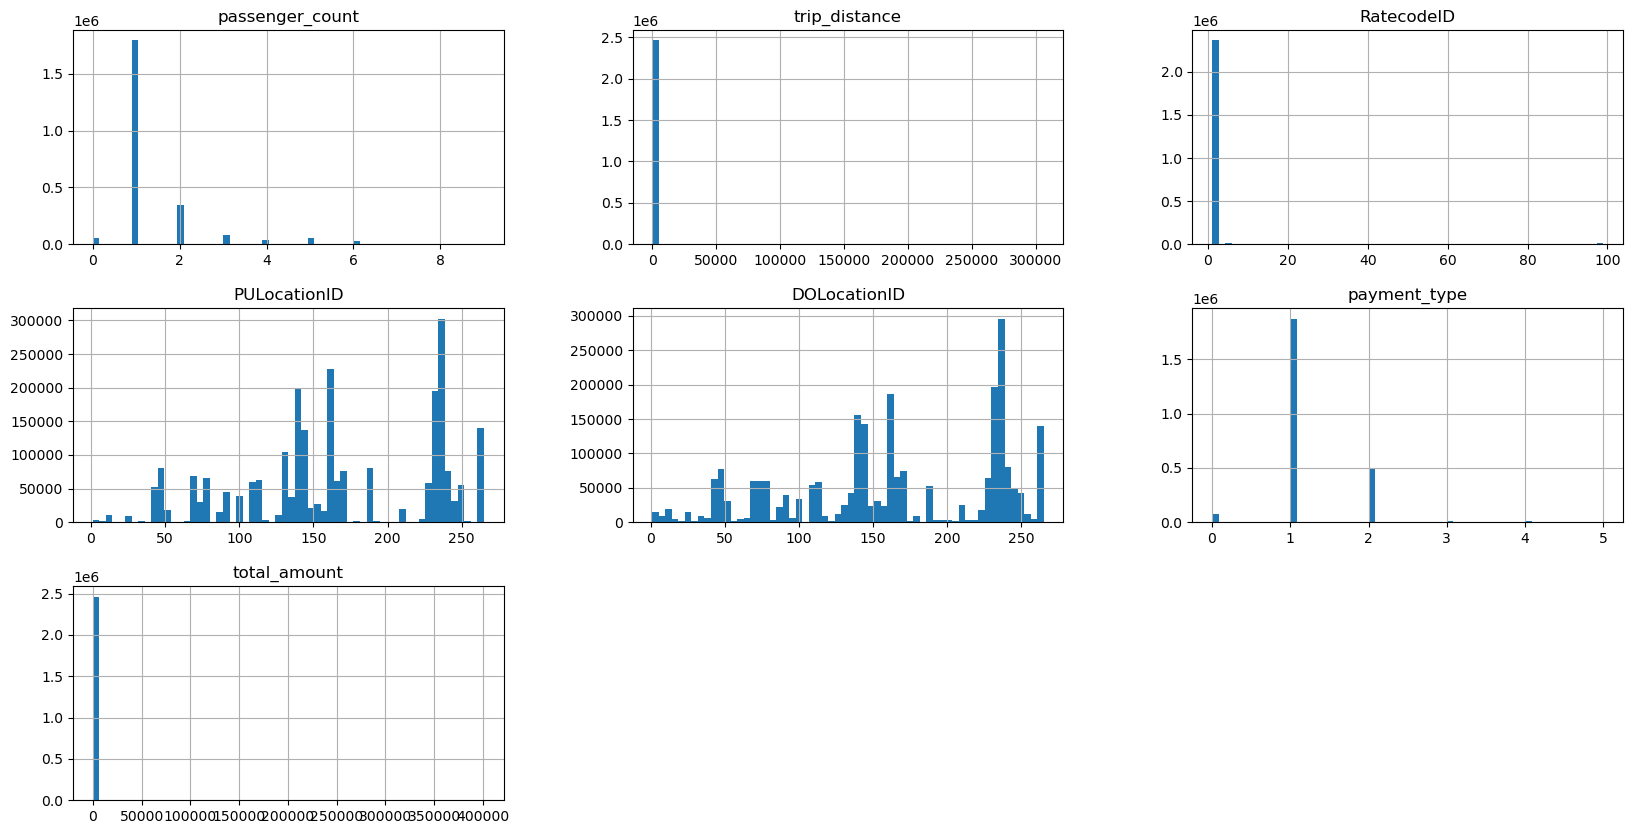

In [431]:
_ = taxi_data.hist(figsize = (20, 10), bins = 60)
plt.show()

In [432]:
taxi_data['passenger_count'].value_counts()

passenger_count
1.0    1794055
2.0     343026
3.0      84570
0.0      52061
5.0      51338
4.0      35321
6.0      32037
7.0          9
8.0          8
9.0          3
Name: count, dtype: int64

In [433]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2296363
2.0       66623
5.0       13561
99.0       8732
3.0        4014
4.0        3118
6.0          17
Name: count, dtype: int64

In [434]:
taxi_data['payment_type'].value_counts()

payment_type
1    1874874
2     495171
0      71503
3      11709
4      10673
5          1
Name: count, dtype: int64

In [435]:
taxi_data['trip_distance'].value_counts()

trip_distance
0.90        39138
1.00        38675
0.80        37981
1.10        37113
1.20        36428
            ...  
49.78           1
32.66           1
41.42           1
48.10           1
77616.82        1
Name: count, Length: 4305, dtype: int64

In [436]:
taxi_data['total_amount'].value_counts()

total_amount
 10.30     42815
 10.80     42785
 9.80      41787
 11.30     41735
 11.80     40524
           ...  
-52.30         1
 6.37          1
 164.87        1
 210.85        1
 41.18         1
Name: count, Length: 11052, dtype: int64

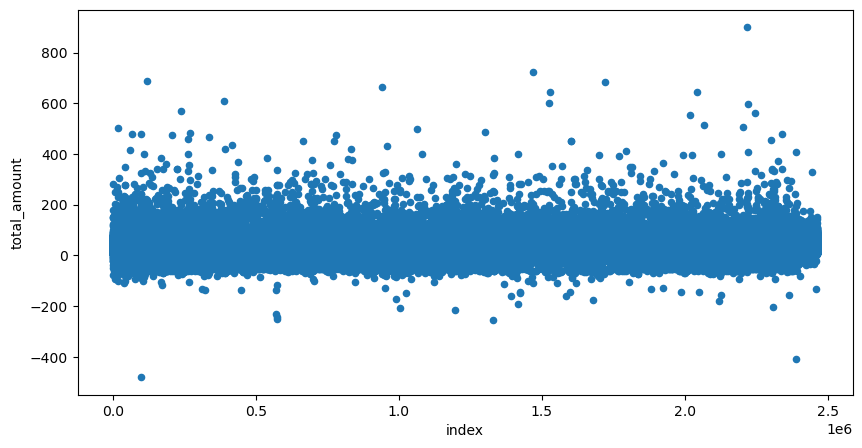

In [437]:
_ = taxi_data[taxi_data['total_amount'] < 1000].reset_index().plot(kind='scatter', y ='total_amount', x='index', figsize=(10, 5))
plt.show()

In [438]:
taxi_data[taxi_data['total_amount'] < 0].shape

(12934, 9)

In [439]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    7384
3    3221
2    2287
0      37
1       5
Name: count, dtype: int64

In [440]:
taxi_data[taxi_data['total_amount'] > 200].shape

(547, 9)

Cutting the range of the total amounts by setting upper limit to $200

In [442]:
print((taxi_data[taxi_data['total_amount'] < 0]['trip_distance'] == 0.0).value_counts())
print((taxi_data[taxi_data['total_amount'] > 0]['trip_distance'] == 0.0).value_counts())
(taxi_data[taxi_data['total_amount'] == 0]['trip_distance'] == 0.0).value_counts()

trip_distance
False    11303
True      1631
Name: count, dtype: int64
trip_distance
False    2423172
True       27351
Name: count, dtype: int64


trip_distance
True     391
False     83
Name: count, dtype: int64

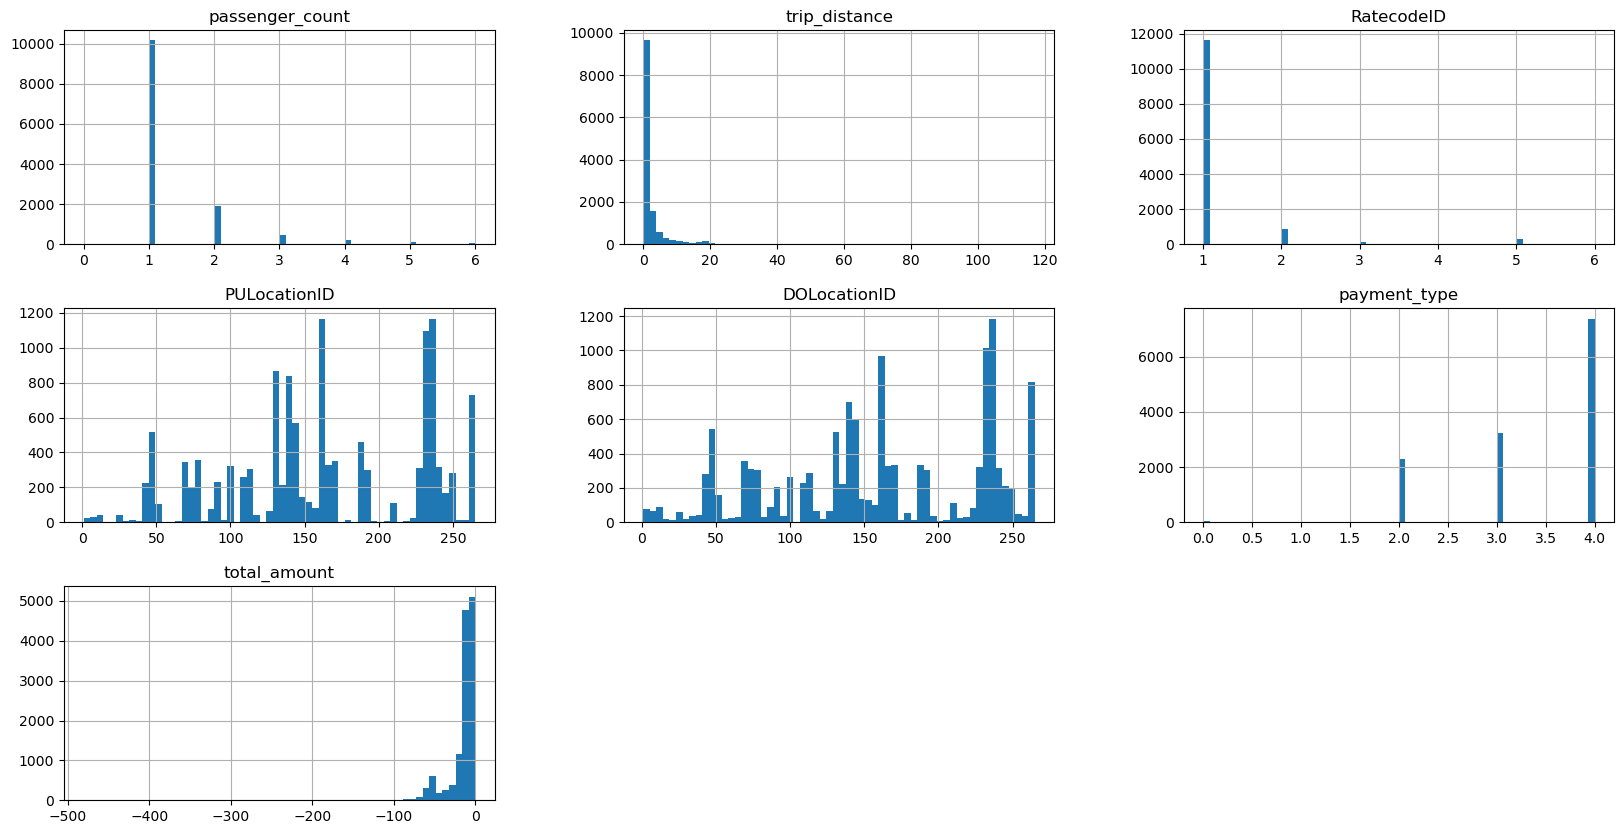

In [443]:
_ = taxi_data[taxi_data['total_amount']<0].hist(figsize=(20,10), bins = 60)
plt.show()

In [444]:
print(taxi_data[taxi_data['total_amount']<=0].shape)
print(taxi_data[taxi_data['trip_distance']==0].shape)

(13408, 9)
(29373, 9)


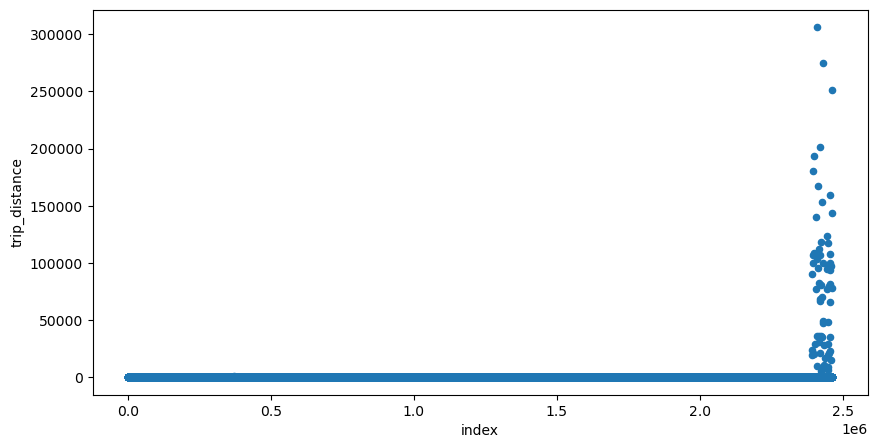

In [445]:
_ = taxi_data.reset_index().plot(kind='scatter', y ='trip_distance', x='index', figsize=(10, 5))
plt.show()

* Fix Null values
* Convert Negative entries of 'total amount' to Positive
* Cut of at $200
* Remove 0 valued distances
* Convert 0 values passenger_count to 1

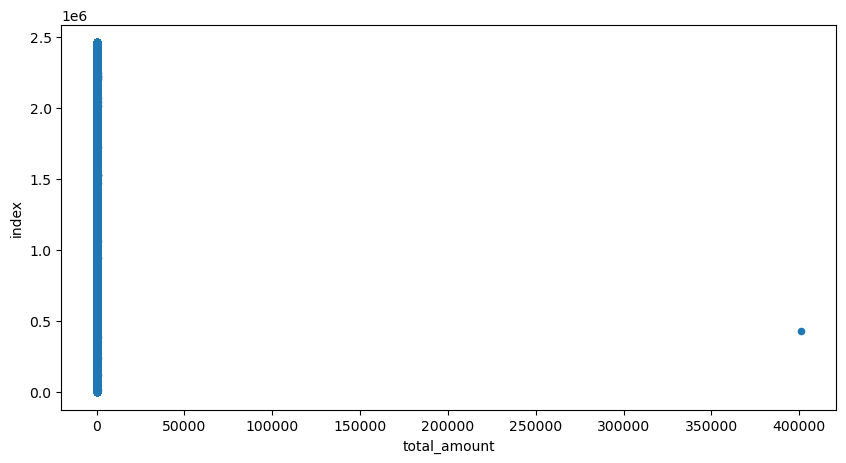

In [447]:
taxi_data['total_amount'] = taxi_data['total_amount'].abs()
(taxi_data['total_amount'] >= 0).value_counts()
_ = taxi_data['total_amount'].reset_index().plot(kind='scatter', x = 'total_amount', y='index', figsize = (10,5))
plt.show()

<h1><b>DATA CLEANING</b></h1>

(2463372, 9)


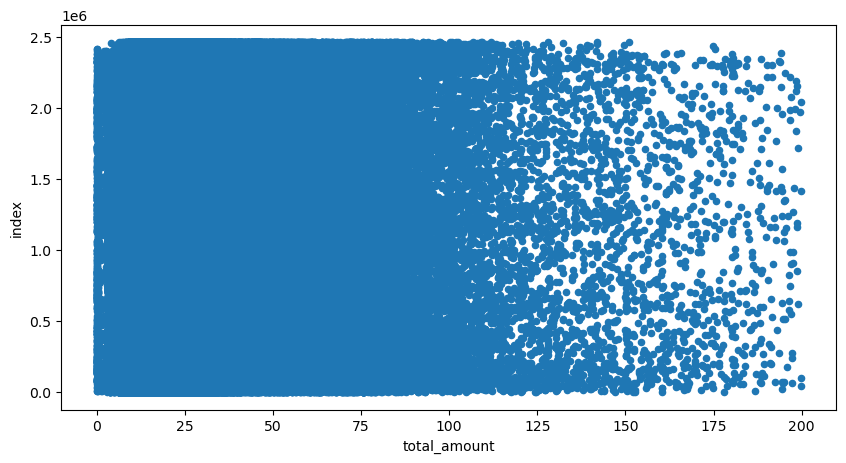

In [449]:
taxi_data_filtered = taxi_data[taxi_data['total_amount'] < 200.0]
print(taxi_data_filtered.shape)
_ = taxi_data_filtered['total_amount'].reset_index().plot(kind='scatter', x = 'total_amount', y='index', figsize = (10,5))
plt.show()

In [450]:
taxi_data_filtered[taxi_data_filtered['trip_distance'] > 50].shape

(330, 9)

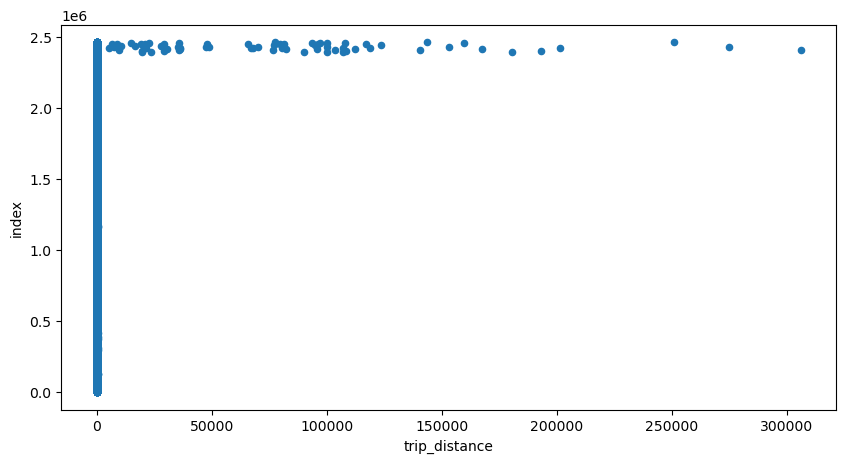

In [451]:
_ = taxi_data_filtered['trip_distance'].reset_index().plot(kind='scatter',  x = 'trip_distance', y ='index', figsize = (10,5))
plt.show()

In [452]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['trip_distance'] < 50]
taxi_data_filtered.shape

(2463042, 9)

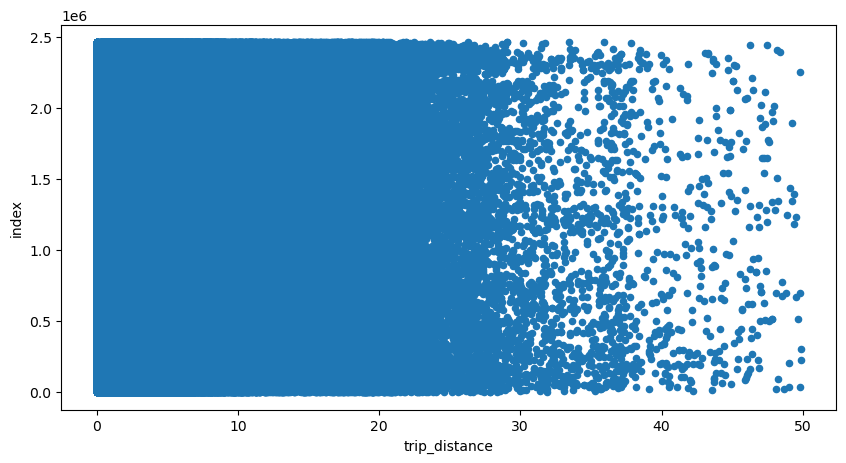

In [453]:
_ = taxi_data_filtered['trip_distance'].reset_index().plot(kind='scatter',  x = 'trip_distance', y ='index', figsize = (10,5))
plt.show()

In [454]:
taxi_data_filtered.isnull().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71431
trip_distance                0
RatecodeID               71431
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [455]:
taxi_data_filtered[taxi_data_filtered['RatecodeID'] == 99].value_counts()

tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  total_amount
2022-01-01 00:10:40   2022-01-01 00:56:08    1.0              0.0            99.0        49            136           1             59.55           1
2022-01-23 06:53:33   2022-01-23 06:59:17    1.0              1.4            99.0        225           17            1             20.00           1
2022-01-23 05:58:22   2022-01-23 06:47:02    1.0              11.9           99.0        216           74            1             48.55           1
2022-01-23 06:13:50   2022-01-23 06:50:40    1.0              7.8            99.0        63            201           1             35.45           1
2022-01-23 06:33:09   2022-01-23 07:18:58    1.0              2.7            99.0        82            7             1             20.00           1
                                                                                                               

In [456]:
taxi_data_filtered['passenger_count'] = taxi_data_filtered['passenger_count'].fillna(1)
taxi_data_filtered['RatecodeID'] = taxi_data_filtered['RatecodeID'].fillna(1)
taxi_data_filtered['RatecodeID'] = taxi_data_filtered['RatecodeID'].replace(99, 1)
taxi_data_filtered[taxi_data_filtered['trip_distance'] == 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
21,2022-01-01 00:06:10,2022-01-01 00:08:58,1.0,0.0,1.0,161,161,4,6.30
141,2022-01-01 00:41:54,2022-01-01 00:42:17,1.0,0.0,1.0,249,249,2,6.30
144,2022-01-01 00:23:57,2022-01-01 00:24:49,0.0,0.0,1.0,263,263,2,6.30
245,2022-01-01 00:49:57,2022-01-01 00:50:17,1.0,0.0,1.0,79,79,2,6.30
362,2022-01-01 00:39:28,2022-01-01 00:39:47,1.0,0.0,5.0,141,140,1,15.36


Filling null values in trip distances with the mean value of the feature.

In [458]:
mean_distance = taxi_data.loc[taxi_data['trip_distance'] > 0, 'trip_distance'].mean()
taxi_data_filtered.loc[(taxi_data_filtered['trip_distance'] == 0), 'trip_distance'] = mean_distance
taxi_data_filtered[taxi_data_filtered['trip_distance'] <= 0].shape

(0, 9)

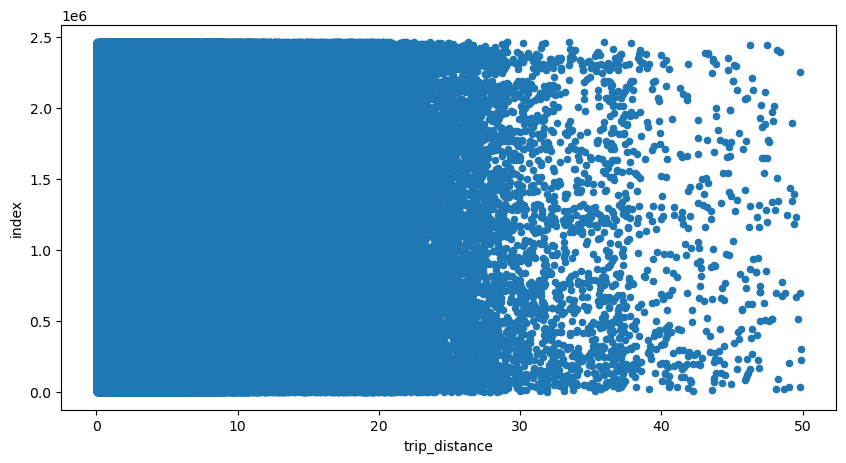

In [459]:
_ = taxi_data_filtered['trip_distance'].reset_index().plot(kind='scatter',  x = 'trip_distance', y ='index', figsize = (10,5))
plt.show()

<h1><b>DATA PREPARATION</b></h1>

In [461]:
taxi_data_prepared = taxi_data_filtered.copy()
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [486]:
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared.loc[:, 'RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared.loc[:, 'PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared.loc[:, 'DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared.loc[:, 'payment_type'].astype(str)

taxi_data_prepared.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime'])
taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])

In [488]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime']).dt.date
taxi_data_prepared['transaction_year'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime']).dt.year
taxi_data_prepared['transaction_month'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime']).dt.month
taxi_data_prepared['transaction_day'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime']).dt.day
taxi_data_prepared['transaction_hour'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime']).dt.hour

changing categorical features to string type to prevent hierarchial inference by model

In [490]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,142,236,1,21.95,2022-01-01,2022,1,1,0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,236,42,1,13.30,2022-01-01,2022,1,1,0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,166,166,1,10.56,2022-01-01,2022,1,1,0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,114,68,2,11.80,2022-01-01,2022,1,1,0
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,68,163,1,30.30,2022-01-01,2022,1,1,0


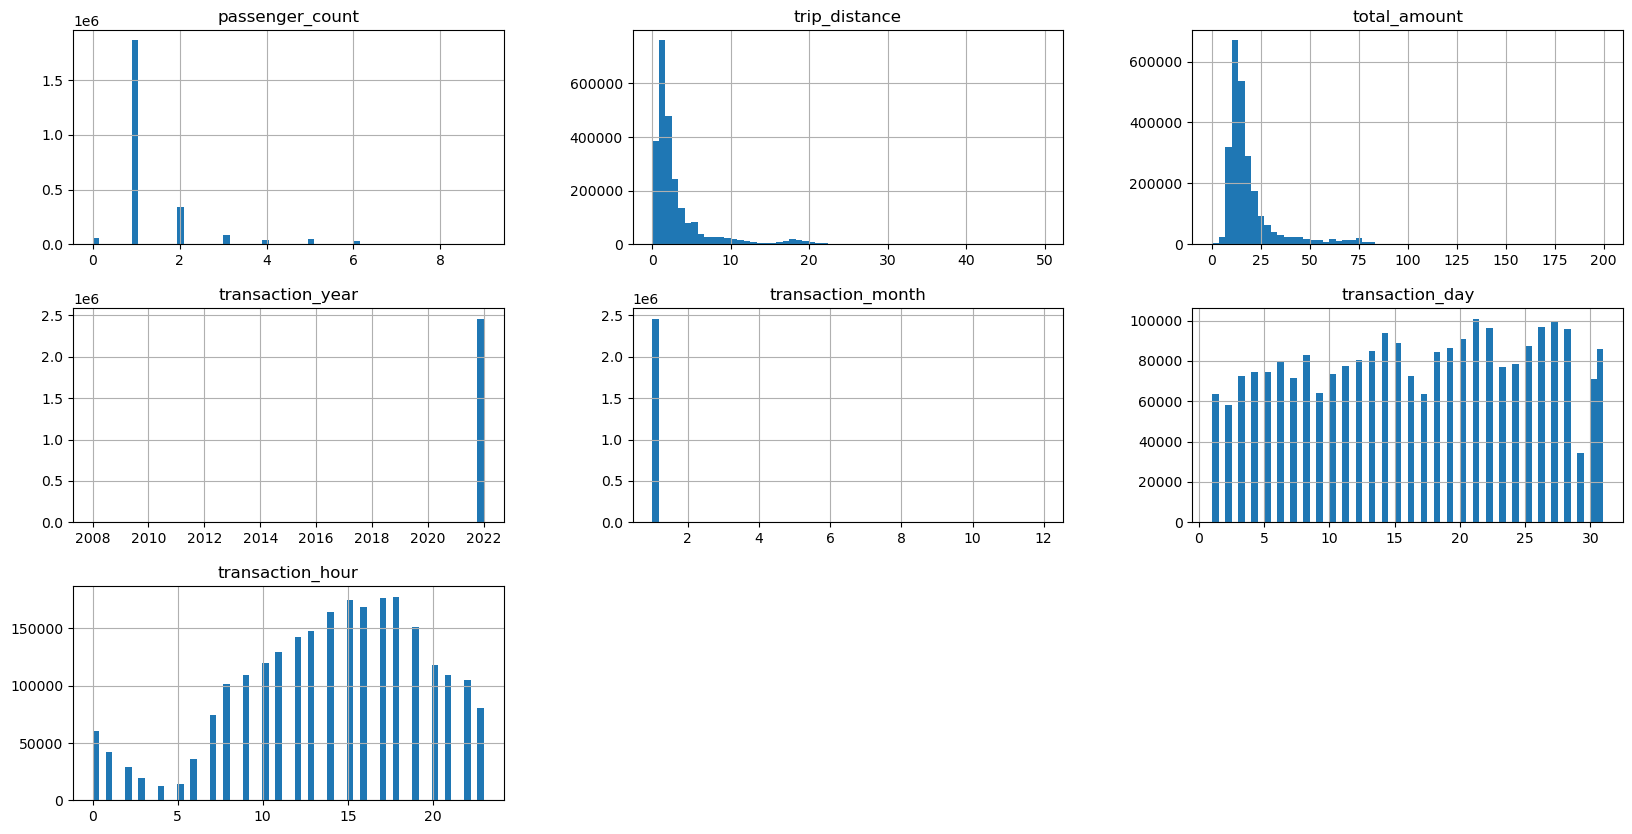

In [492]:
_ = taxi_data_prepared.hist(figsize = (20,10), bins = 60)
plt.show()

In [496]:
taxi_data_prepared  = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2022]
taxi_data_prepared  = taxi_data_prepared[taxi_data_prepared['transaction_month'] == 1]

In [498]:
categorical_columns = ['transaction_date', 'transaction_hour', 'transaction_month', 'transaction_day', 'PULocationID']
numerical_columns = ['trip_distance', 'total_amount']
all_columns = categorical_columns + numerical_columns

main_taxi_df = taxi_data_prepared[all_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2462990, 7)


,transaction_date,transaction_hour,transaction_month,transaction_day,PULocationID,trip_distance,total_amount
0,2022-01-01,0,1,1,142,3.80,21.95
1,2022-01-01,0,1,1,236,2.10,13.30
2,2022-01-01,0,1,1,166,0.97,10.56
3,2022-01-01,0,1,1,114,1.09,11.80
4,2022-01-01,0,1,1,68,4.30,30.30


In [500]:
taxi_groupedby_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_groupedby_region['transaction_count'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
taxi_groupedby_region

,transaction_date,transaction_hour,transaction_month,transaction_day,PULocationID,trip_distance,total_amount,transaction_count
0,2022-01-01,0,1,1,10,7.910000,25.300000,1
1,2022-01-01,0,1,1,100,5.976667,31.918333,6
2,2022-01-01,0,1,1,107,2.677540,17.528031,127
3,2022-01-01,0,1,1,112,4.988787,16.720000,2
4,2022-01-01,0,1,1,113,2.740484,17.948065,62
...,...,...,...,...,...,...,...,...
66817,2022-01-31,23,1,31,87,3.851111,20.308889,9
66818,2022-01-31,23,1,31,88,5.255858,18.633333,3
66819,2022-01-31,23,1,31,90,3.207464,19.294559,68
66820,2022-01-31,23,1,31,91,1.100000,8.800000,1


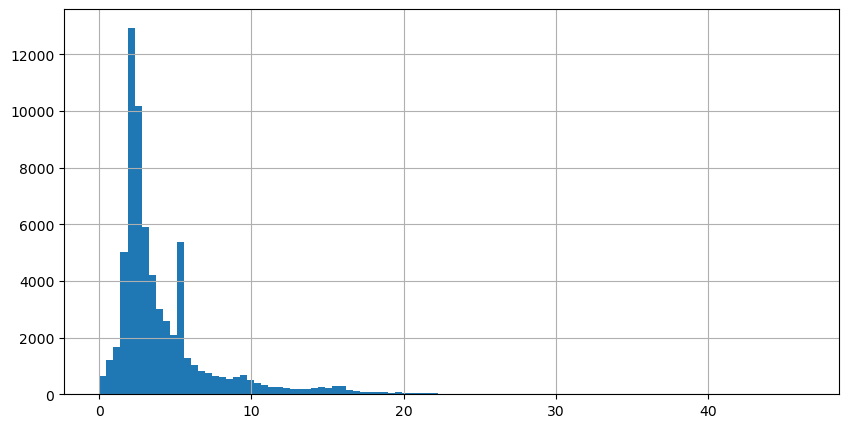

In [502]:
_ = taxi_groupedby_region['trip_distance'].hist(figsize = (10,5), bins=100)
plt.show()


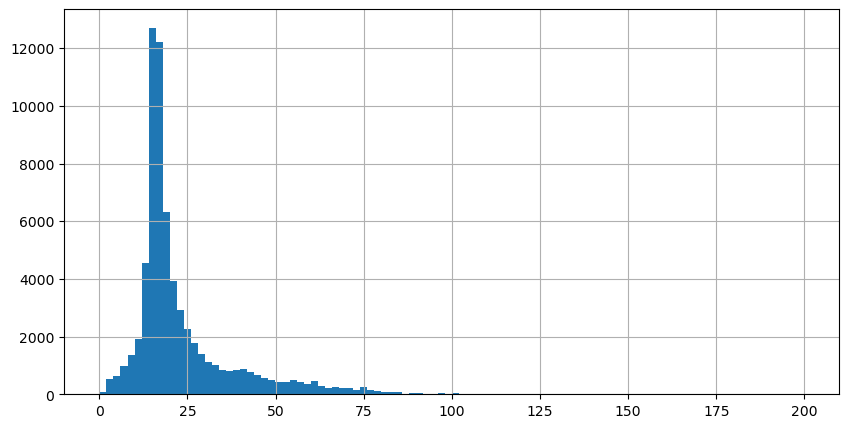

In [504]:
_ = taxi_groupedby_region['total_amount'].hist(figsize = (10,5), bins=100)
plt.show()

<h1><b>BENCHMARK MODEL</b></h1>

In [506]:
data_benchmark = taxi_groupedby_region.copy()

In [508]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

In [510]:
from sklearn.model_selection import train_test_split

X_bench = data_benchmark[input_features_benchmark]
Y_bench = data_benchmark[target_feature_benchmark]

X_bench = pd.get_dummies(X_bench)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_bench, Y_bench, test_size=0.33, random_state=42)
X_Train

,transaction_month,transaction_day,transaction_hour,trip_distance,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_101,PULocationID_102,PULocationID_105,...,PULocationID_9,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_94,PULocationID_95,PULocationID_96,PULocationID_97,PULocationID_98
51225,1,24,21,2.218571,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22647,1,11,16,2.145000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12689,1,6,22,2.820588,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26373,1,13,11,2.377758,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53336,1,25,20,2.603077,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1,18,12,6.050000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6265,1,3,22,2.422000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54886,1,26,13,10.400000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,1,1,9,3.415000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [512]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10)
model.fit(X_Train, Y_Train)

DecisionTreeRegressor(max_depth=10)

In [514]:
current_model = model
y_pred = current_model.predict(X_Test)

from math import sqrt
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score

print('Mean_absolute_error:', mean_absolute_error(Y_Test, y_pred))
print('Mean_squared_error:', mean_squared_error(Y_Test, y_pred))
print('Root_mean_squared_error:', sqrt(mean_squared_error(Y_Test, y_pred)))
print('R2:', r2_score(Y_Test, y_pred))


Mean_absolute_error: 4.1054358853376245
Mean_squared_error: 81.51729633023278
Root_mean_squared_error: 9.028692946946018
R2: 0.6892572940853183


            true       pred
22652  27.716000  24.624035
13915  28.575000  24.624035
13631  13.917358  14.516670
45383  58.133778  60.158591
10089  16.575468  15.751051


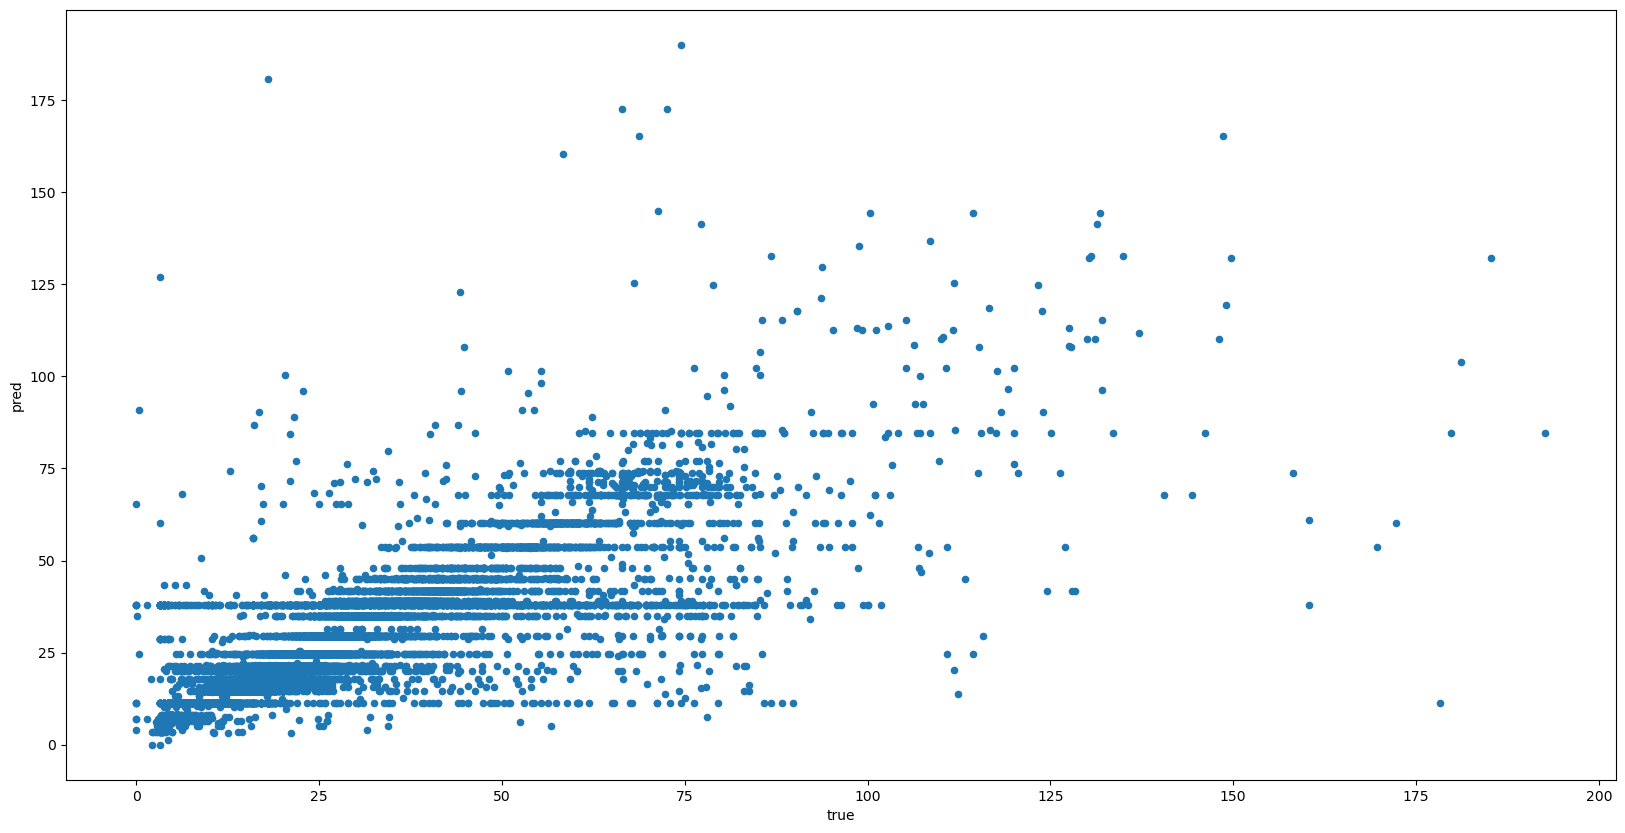

In [516]:
data = {'true': Y_Test, 'pred': y_pred}
results = pd.DataFrame(data)
print(results.head())
_ = results.plot(figsize=(20, 10), kind='scatter', x='true', y='pred')
plt.show()

Model is fitted with trip distance. The following model is trained without the feature.

In [518]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'


from sklearn.model_selection import train_test_split

X_bench = data_benchmark[input_features_benchmark]
y_bench = data_benchmark[target_feature_benchmark]


X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)


model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.16530285119873
mean_squared_error 210.92215446498457
root_mean_squared_error 14.523159245322093
r2 0.19596792378532768


<h1><b>FEATURE ENGINEERING</b></h1>

In [630]:
data_with_new_features = data_benchmark.copy()
data_with_new_features.head()

,transaction_date,transaction_hour,transaction_month,transaction_day,PULocationID,trip_distance,total_amount,transaction_count
0,2022-01-01,0,1,1,10,7.910000,25.300000,1
1,2022-01-01,0,1,1,100,5.976667,31.918333,6
2,2022-01-01,0,1,1,107,2.677540,17.528031,127
3,2022-01-01,0,1,1,112,4.988787,16.720000,2
4,2022-01-01,0,1,1,113,2.740484,17.948065,62


In [631]:
data_with_new_features['transaction_weekday'] = pd.to_datetime(data_with_new_features['transaction_date']).dt.weekday
data_with_new_features['is_weekend'] = data_with_new_features['transaction_weekday'].apply(lambda x: True if x==5 or x==6 else False)

In [632]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2023', end='2025').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [633]:
data_with_new_features.head()

,transaction_date,transaction_hour,transaction_month,transaction_day,PULocationID,trip_distance,total_amount,transaction_count,transaction_weekday,is_weekend,is_holiday
0,2022-01-01,0,1,1,10,7.910000,25.300000,1,5,True,False
1,2022-01-01,0,1,1,100,5.976667,31.918333,6,5,True,False
2,2022-01-01,0,1,1,107,2.677540,17.528031,127,5,True,False
3,2022-01-01,0,1,1,112,4.988787,16.720000,2,5,True,False
4,2022-01-01,0,1,1,113,2.740484,17.948065,62,5,True,False


In [634]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [635]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,transaction_date,transaction_hour,transaction_month,transaction_day,PULocationID,trip_distance,total_amount,transaction_count,transaction_weekday,is_weekend,is_holiday,Borough
0,2022-01-01,0,1,1,10,7.910000,25.300000,1,5,True,False,Queens
1,2022-01-01,0,1,1,100,5.976667,31.918333,6,5,True,False,Manhattan
2,2022-01-01,0,1,1,107,2.677540,17.528031,127,5,True,False,Manhattan
3,2022-01-01,0,1,1,112,4.988787,16.720000,2,5,True,False,Brooklyn
4,2022-01-01,0,1,1,113,2.740484,17.948065,62,5,True,False,Manhattan


In [636]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        41951
Queens           10829
Brooklyn          8996
Bronx             3276
Unknown            724
EWR                204
Staten Island      126
Name: count, dtype: int64

In [637]:
nyc_weather = pd.read_csv("data/NYC_Central_Park_weather_1869-2022.csv")
nyc_weather['weather_date'] = pd.to_datetime(nyc_weather.loc[:,'DATE']).dt.date.astype(str)
nyc_weather['weather_day'] = pd.to_datetime(nyc_weather.loc[:,'DATE']).dt.day.astype(str)
nyc_weather['weather_year'] = pd.to_datetime(nyc_weather.loc[:,'DATE']).dt.year.astype(str)
nyc_weather['weather_month'] = pd.to_datetime(nyc_weather.loc[:,'DATE']).dt.month.astype(str)

nyc_weather = nyc_weather.drop(columns=['DATE'])
nyc_weather.head()

,PRCP,SNOW,SNWD,TMIN,TMAX,weather_date,weather_day,weather_year,weather_month
0,0.75,9.0,NaN,19.0,29.0,1869-01-01,1,1869,1
1,0.03,0.0,NaN,21.0,27.0,1869-01-02,2,1869,1
2,0.00,0.0,NaN,27.0,35.0,1869-01-03,3,1869,1
3,0.18,0.0,NaN,34.0,37.0,1869-01-04,4,1869,1
4,0.05,0.0,NaN,37.0,43.0,1869-01-05,5,1869,1


In [638]:
nyc_weather.isna().sum()

PRCP                 0
SNOW               163
SNWD             16558
TMIN                 7
TMAX                 7
weather_date         0
weather_day          0
weather_year         0
weather_month        0
dtype: int64

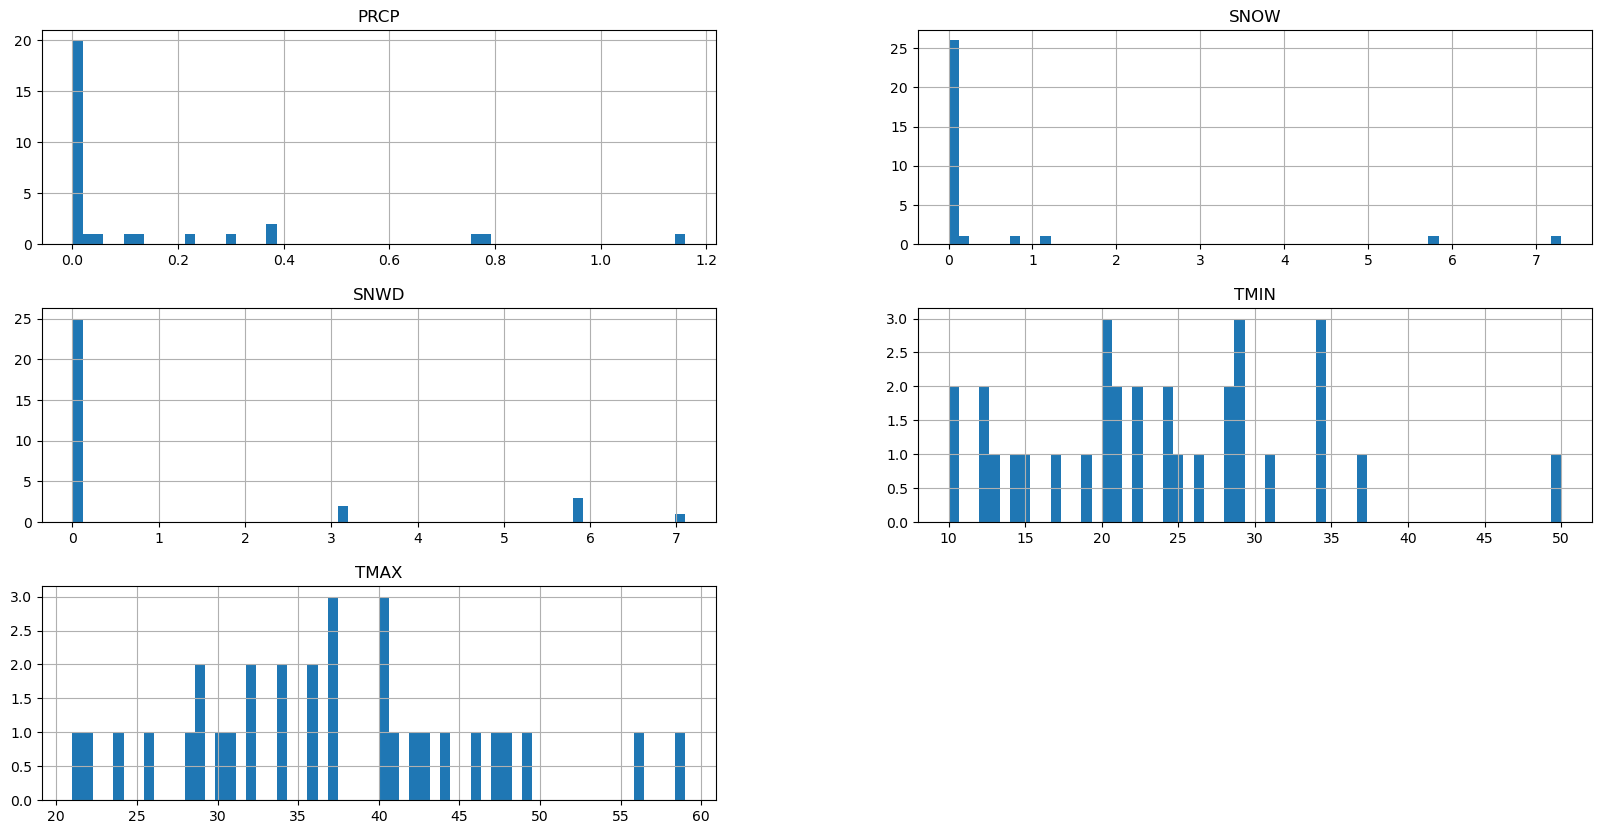

In [639]:
filtered_nycw = nyc_weather.copy()
filtered_nycw = filtered_nycw[filtered_nycw['weather_year'] == '2022']
filtered_nycw = filtered_nycw[filtered_nycw['weather_month'] == '1']
_ = filtered_nycw.hist(figsize=(20,10), bins=60)
plt.show()

In [640]:
filtered_nycw['weather_date'] = pd.to_datetime(filtered_nycw.loc[:,'weather_date']).dt.date
filtered_nycw['weather_day'] = pd.to_datetime(filtered_nycw.loc[:,'weather_date']).dt.day
filtered_nycw['weather_year'] = pd.to_datetime(filtered_nycw.loc[:,'weather_date']).dt.year
filtered_nycw['weather_month'] = pd.to_datetime(filtered_nycw.loc[:,'weather_date']).dt.month
filtered_nycw.dtypes

PRCP             float64
SNOW             float64
SNWD             float64
TMIN             float64
TMAX             float64
weather_date      object
weather_day        int32
weather_year       int32
weather_month      int32
dtype: object

In [645]:

data_with_new_features  = data_with_new_features.merge(filtered_nycw, left_on=['transaction_date', 'transaction_month', 'transaction_day'],right_on=['weather_date', 'weather_month', 'weather_day'], how='left')
data_with_new_features.head()
data_with_new_features.drop(columns=['weather_date', 'weather_day','weather_year', 'weather_month'])

,transaction_date,transaction_hour,transaction_month,transaction_day,PULocationID,trip_distance,total_amount,transaction_count,transaction_weekday,is_weekend,is_holiday,Borough,PRCP,SNOW,SNWD,TMIN,TMAX
0,2022-01-01,0,1,1,10,7.910000,25.300000,1,5,True,False,Queens,0.79,0.0,0.0,50.0,56.0
1,2022-01-01,0,1,1,100,5.976667,31.918333,6,5,True,False,Manhattan,0.79,0.0,0.0,50.0,56.0
2,2022-01-01,0,1,1,107,2.677540,17.528031,127,5,True,False,Manhattan,0.79,0.0,0.0,50.0,56.0
3,2022-01-01,0,1,1,112,4.988787,16.720000,2,5,True,False,Brooklyn,0.79,0.0,0.0,50.0,56.0
4,2022-01-01,0,1,1,113,2.740484,17.948065,62,5,True,False,Manhattan,0.79,0.0,0.0,50.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66817,2022-01-31,23,1,31,87,3.851111,20.308889,9,0,False,False,Manhattan,0.00,0.0,5.9,21.0,31.0
66818,2022-01-31,23,1,31,88,5.255858,18.633333,3,0,False,False,Manhattan,0.00,0.0,5.9,21.0,31.0
66819,2022-01-31,23,1,31,90,3.207464,19.294559,68,0,False,False,Manhattan,0.00,0.0,5.9,21.0,31.0
66820,2022-01-31,23,1,31,91,1.100000,8.800000,1,0,False,False,Brooklyn,0.00,0.0,5.9,21.0,31.0
